# Exercise 5
#### Lars Kühmichel, Nicolas Wolf

## 3 Constructing the matrix X

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.sparse import coo_matrix, load_npz
from scipy.sparse.linalg import lsqr

assigning angle 1 / 3
assigning angle 2 / 3
assigning angle 3 / 3
assigning angle 1 / 90
assigning angle 2 / 90
assigning angle 3 / 90
assigning angle 4 / 90
assigning angle 5 / 90
assigning angle 6 / 90
assigning angle 7 / 90
assigning angle 8 / 90
assigning angle 9 / 90
assigning angle 10 / 90
assigning angle 11 / 90
assigning angle 12 / 90
assigning angle 13 / 90
assigning angle 14 / 90
assigning angle 15 / 90
assigning angle 16 / 90
assigning angle 17 / 90
assigning angle 18 / 90
assigning angle 19 / 90
assigning angle 20 / 90
assigning angle 21 / 90
assigning angle 22 / 90
assigning angle 23 / 90
assigning angle 24 / 90
assigning angle 25 / 90
assigning angle 26 / 90
assigning angle 27 / 90
assigning angle 28 / 90
assigning angle 29 / 90
assigning angle 30 / 90
assigning angle 31 / 90
assigning angle 32 / 90
assigning angle 33 / 90
assigning angle 34 / 90
assigning angle 35 / 90
assigning angle 36 / 90
assigning angle 37 / 90
assigning angle 38 / 90
assigning angle 39 / 90
assigni

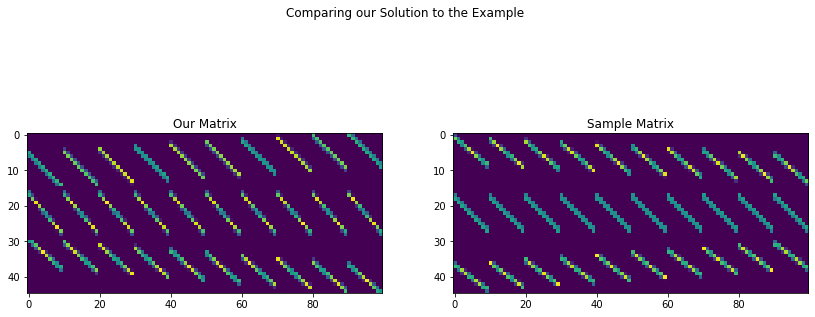

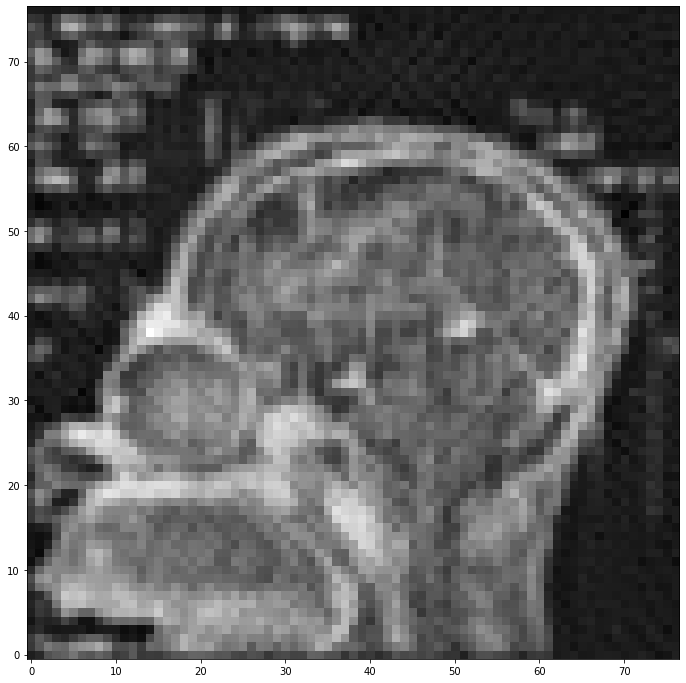

In [4]:
def construct_X(M, alphas, Np=None):
    if Np is None:
        # no number of sensors given
        # choose large enough odd number (at least sqrt(2) * M)
        n = int(np.ceil(M / np.sqrt(2)))
        Np = 2 * n + 1

    # convert alpha to radians
    alphas = np.deg2rad(alphas)

    No = len(alphas)

    x  = y = np.linspace(-M/2, M/2, M)
    x, y, alphas = np.meshgrid(x, y, alphas)

    tana = np.tan(alphas)

    # distance of rays from center of sensor array
    projections = (x + y * tana) / (np.sqrt(1 + tana ** 2))

    # length of the sensor array
    l = np.sqrt(2) * M

    # convert distances into #sensors from left
    sensors = Np * (projections / l + 0.5)

    # assert (0 <= sensors).all()
    # assert (sensors < Np).all()
    # print("assertions passed")

    sensorleft = np.floor(sensors - 0.5).astype(int)
    sensorright = sensorleft + 1

    frac = sensors % 1

    weightright = (frac - 0.5) % 1
    weightleft = 1 - weightright

    N = Np * No
    D = M * M
    X = np.zeros((N, D))
    # X = coo_matrix((N, D))

    def add_X(io, j1, j2, sensors, weights):
        sensor = sensors[j1, j2, io]
        if sensor < 0 or sensor >= Np:
            # ignore sensors that are out of range
            return
        weight = weights[j1, j2, io]

        X[sensor + Np * io, M * j1 + j2] += weight

    for io in range(No):
        print(f"assigning angle {io + 1} / {No}")
        for j1 in range(M):
            for j2 in range(M):
                add_X(io, j1, j2, sensorleft, weightleft)
                add_X(io, j1, j2, sensorright, weightright)

    for io in range(No):
        sleft = sensorleft + Np * io
        sright = sensorright + Np * io



    return coo_matrix(X)


M = 10
alphas = [-33, 1, 42]
Np = 15

X = construct_X(M, alphas, Np)
X_example = np.load("data/X_example.npy")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].imshow(X.toarray())
axes[0].set_title("Our Matrix")
axes[1].imshow(X_example)
axes[1].set_title("Sample Matrix")
fig.suptitle("Comparing our Solution to the Example")
plt.show()

M = 77
Np = 109
alphas = np.load("data/alphas_77.npy")
y = np.load("data/y_77.npy")

# M = 195
# Np = 275
# alphas = np.load("data/alphas_195.npy")
# y = np.load("data/y_195.npy")

X = construct_X(M, alphas, Np)

print(X.shape)
print(y.shape)

atol = btol = 1e-2
beta, *_ = lsqr(X, y, atol, btol)

beta = beta.reshape((M, M))

plt.figure(figsize=(12, 12))
plt.imshow(beta, origin="lower", cmap="gray")
plt.show()